# YouTube Likes Prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_excel("C:\\Users\\user\\Downloads\\Project3\\USvideos.xlsx")

In [3]:
df

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41041,6SvSYSE122,17.14.11,HomeMade Electric Airplane,PeterSripol,28,2017-11-13T15:30:17.000Z,"ultralight|""airplane""|""homemade""|""DIY""|""hoverb...",1064798,60008,382,20,https://i.ytimg.com/vi/eNSN6qet1kE/default.jpg,False,False,False,aaaannnd now to fly out of ground effect! The ...
41042,6SvSYSE123,17.14.11,Founding An Inbreeding-Free Space Colony,SciShow,27,2017-11-12T22:00:01.000Z,"SciShow|""science""|""Hank""|""Green""|""education""|""...",#,#,#,*,https://i.ytimg.com/vi/B5HORANmzHw/default.jpg,False,False,False,Thanks to 23AndMe for supporting SciShow. Thes...
41043,6SvSYSE124,17.14.11,How Can You Control Your Dreams?,Life Noggin,27,2017-11-13T14:00:03.000Z,"life noggin|""life noggin youtube""|""youtube lif...",1064798,60008,382,20,https://i.ytimg.com/vi/vU14JY3x81A/default.jpg,False,False,False,What if there was a way to control your dreams...
41044,6SvSYSE125,17.14.11,The Making of Hela's Headdress from Thor: Ragn...,Tested,28,2017-11-12T15:00:01.000Z,"tested|""testedcom""|""designercon 2017""|""preview...",NaN,NaN,NaN,NaN,https://i.ytimg.com/vi/6VhU_T463sU/default.jpg,False,False,False,"At this year's DesignerCon, we meet up with Ir..."


In [4]:
df.shape

(41046, 16)

In [5]:
df.isna().any().any()

True

In [6]:
df.isna().sum()

video_id                  416
trending_date               0
title                       0
channel_title               0
category_id                 0
publish_time                0
tags                        0
views                      30
likes                      34
dislikes                   37
comment_count              37
thumbnail_link              0
comments_disabled           0
ratings_disabled            0
video_error_or_removed      0
description               570
dtype: int64

In [7]:
df[df["views"].apply(lambda x: pd.isna(x))].head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
40950,PwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",NaN,NaN,NaN,NaN,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
40954,gHQz0KiKM,17.14.11,2 Weeks with iPhone X,iJustine,28,2017-11-13T19:07:23.000Z,"ijustine|""week with iPhone X""|""iphone x""|""appl...",NaN,NaN,NaN,NaN,https://i.ytimg.com/vi/gHZ1Qz0KiKM/default.jpg,False,False,False,Using the iPhone for the past two weeks -- her...
40957,jrXwC9vc,17.14.11,The Greatest Showman | Official Trailer 2 [HD]...,20th Century Fox,1,2017-11-13T14:00:23.000Z,"Trailer|""Hugh Jackman""|""Michelle Williams""|""Za...",NaN,60008,382,20,https://i.ytimg.com/vi/jr9QtXwC9vc/default.jpg,False,False,False,"Inspired by the imagination of P.T. Barnum, Th..."
40959,9wRQljFNDW8,17.14.11,Dion Lewis' 103-Yd Kick Return TD vs. Denver! ...,NFL,17,2017-11-13T02:05:26.000Z,"NFL|""Football""|""offense""|""defense""|""afc""|""nfc""...",NaN,60008,382,20,https://i.ytimg.com/vi/9wRQljFNDW8/default.jpg,False,False,False,New England Patriots returner Dion Lewis blast...
40962,Gn66oK_A,17.14.11,Which Countries Are About To Collapse?,NowThis World,25,2017-11-12T14:00:00.000Z,"nowthis|""nowthis world""|""world news""|""nowthis ...",NaN,NaN,NaN,NaN,https://i.ytimg.com/vi/GgVmn66oK_A/default.jpg,False,False,False,"The world at large is improving, but some coun..."


# Data Cleaning

In [8]:
df["video_id"] = df["video_id"].fillna(value="")

In [9]:
df["video_id"].isna().any().any()

False

In [10]:
df["description"] = df["description"].fillna(value="")

In [11]:
df["description"].isna().any().any()

False

In [12]:
df["views"]=df.views.fillna(method="bfill")

In [13]:
df["views"].isna().any().any()

False

In [14]:
df["likes"]=df.likes.fillna(method="bfill")

In [15]:
df["likes"].isna().any().any()

False

In [16]:
df["dislikes"]=df.dislikes.fillna(method="bfill")

In [17]:
df["dislikes"].isna().any().any()

False

In [18]:
df["comment_count"]=df.comment_count.fillna(method="bfill")

In [19]:
df["comment_count"].isna().any().any()

False

In [20]:
df

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41041,6SvSYSE122,17.14.11,HomeMade Electric Airplane,PeterSripol,28,2017-11-13T15:30:17.000Z,"ultralight|""airplane""|""homemade""|""DIY""|""hoverb...",1064798,60008,382,20,https://i.ytimg.com/vi/eNSN6qet1kE/default.jpg,False,False,False,aaaannnd now to fly out of ground effect! The ...
41042,6SvSYSE123,17.14.11,Founding An Inbreeding-Free Space Colony,SciShow,27,2017-11-12T22:00:01.000Z,"SciShow|""science""|""Hank""|""Green""|""education""|""...",#,#,#,*,https://i.ytimg.com/vi/B5HORANmzHw/default.jpg,False,False,False,Thanks to 23AndMe for supporting SciShow. Thes...
41043,6SvSYSE124,17.14.11,How Can You Control Your Dreams?,Life Noggin,27,2017-11-13T14:00:03.000Z,"life noggin|""life noggin youtube""|""youtube lif...",1064798,60008,382,20,https://i.ytimg.com/vi/vU14JY3x81A/default.jpg,False,False,False,What if there was a way to control your dreams...
41044,6SvSYSE125,17.14.11,The Making of Hela's Headdress from Thor: Ragn...,Tested,28,2017-11-12T15:00:01.000Z,"tested|""testedcom""|""designercon 2017""|""preview...",1064798,60008,382,20,https://i.ytimg.com/vi/6VhU_T463sU/default.jpg,False,False,False,"At this year's DesignerCon, we meet up with Ir..."


In [21]:
df.dtypes

video_id                  object
trending_date             object
title                     object
channel_title             object
category_id                int64
publish_time              object
tags                      object
views                     object
likes                     object
dislikes                  object
comment_count             object
thumbnail_link            object
comments_disabled           bool
ratings_disabled            bool
video_error_or_removed      bool
description               object
dtype: object

In [22]:
df.views.unique()

array([748374, 2418783, 3191434, ..., 5660813, 10306119, '#'],
      dtype=object)

In [23]:
df.loc[df["views"]=="#"]

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
41042,6SvSYSE123,17.14.11,Founding An Inbreeding-Free Space Colony,SciShow,27,2017-11-12T22:00:01.000Z,"SciShow|""science""|""Hank""|""Green""|""education""|""...",#,#,#,*,https://i.ytimg.com/vi/B5HORANmzHw/default.jpg,False,False,False,Thanks to 23AndMe for supporting SciShow. Thes...


In [24]:
df.views.replace("#",np.nan,inplace=True)
df["views"]=df.views.fillna(method="bfill")

In [25]:
df["views"]=df["views"].astype(float)

In [26]:
df["views"].dtypes

dtype('float64')

In [27]:
df.loc[df["likes"]=="#"]

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
41042,6SvSYSE123,17.14.11,Founding An Inbreeding-Free Space Colony,SciShow,27,2017-11-12T22:00:01.000Z,"SciShow|""science""|""Hank""|""Green""|""education""|""...",1064798.0,#,#,*,https://i.ytimg.com/vi/B5HORANmzHw/default.jpg,False,False,False,Thanks to 23AndMe for supporting SciShow. Thes...


In [28]:
df.likes.replace("#",np.nan,inplace=True)
df["likes"]=df.likes.fillna(method="bfill")

In [29]:
df["likes"]=df["likes"].astype(float)
df["likes"].dtypes

dtype('float64')

In [30]:
df.dislikes.replace("#",np.nan,inplace=True)
df["dislikes"]=df.dislikes.fillna(method="bfill")

In [31]:
df["dislikes"]=df["dislikes"].astype(float)
df["dislikes"].dtypes

dtype('float64')

In [32]:
df.comment_count.replace("*",np.nan,inplace=True)
df["comment_count"]=df.comment_count.fillna(method="bfill")

In [33]:
df["comment_count"]=df["comment_count"].astype(float)
df["comment_count"].dtypes

dtype('float64')

In [34]:
df.dtypes

video_id                   object
trending_date              object
title                      object
channel_title              object
category_id                 int64
publish_time               object
tags                       object
views                     float64
likes                     float64
dislikes                  float64
comment_count             float64
thumbnail_link             object
comments_disabled            bool
ratings_disabled             bool
video_error_or_removed       bool
description                object
dtype: object

In [35]:
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374.0,57527.0,2966.0,15954.0,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783.0,97185.0,6146.0,12703.0,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434.0,146033.0,5339.0,8181.0,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168.0,10172.0,666.0,2146.0,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731.0,132235.0,1989.0,17518.0,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [36]:
df.shape

(41046, 16)

In [37]:
df.duplicated().sum()

48

In [38]:
df[df.duplicated()]

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
34899,QBL8IRJ5yHU,18.15.05,Why I'm So Scared (being myself and crying too...,grav3yardgirl,26,2018-05-14T19:00:01.000Z,"beauty|""how to""|""makeup""|""howto""|""style""|""fash...",1469627.0,188652.0,3124.0,33032.0,https://i.ytimg.com/vi/QBL8IRJ5yHU/default.jpg,False,False,False,I will never be able to say Thank You enough.....
34900,t4pRQ0jn23Q,18.15.05,YoungBoy Never Broke Again Goes Sneaker Shoppi...,Complex,24,2018-05-14T14:00:03.000Z,"sneakerhead|""complex""|""complex originals""|""sne...",1199587.0,49709.0,2380.0,7261.0,https://i.ytimg.com/vi/t4pRQ0jn23Q/default.jpg,False,False,False,YoungBoy Never Broke Again goes Sneaker Shoppi...
34901,j4KvrAUjn6c,18.15.05,WE MADE OUR MOM CRY...HER DREAM CAME TRUE!,Lucas and Marcus,24,2018-05-13T18:03:56.000Z,"Lucas and Marcus|""Marcus and Lucas""|""Dobre""|""D...",3906727.0,77378.0,12160.0,15874.0,https://i.ytimg.com/vi/j4KvrAUjn6c/default.jpg,False,False,False,BEST MOM EVER! WANT TO SEE US IN NYC & NJ?!BUY...
34902,MAjY8mCTXWk,18.15.05,"周杰倫 Jay Chou【不愛我就拉倒 If You Don't Love Me, It's...",杰威爾音樂 JVR Music,10,2018-05-14T15:59:47.000Z,"周杰倫|""Jay""|""Chou""|""周董""|""周杰伦""|""周傑倫""|""杰威尔""|""周周""|""...",916128.0,40485.0,1042.0,4746.0,https://i.ytimg.com/vi/MAjY8mCTXWk/default.jpg,False,False,False,詞：周杰倫、宋健彰（彈頭） 曲：周杰倫憂鬱型男的走心旋律 用英式搖滾宣洩情傷不愛我就拉倒...
34903,xhs8tf1v__w,18.15.05,Terry Crews Answers the Web's Most Searched Qu...,WIRED,24,2018-05-14T16:00:29.000Z,"autocomplete|""deadpool 2""|""google autocomplete...",343967.0,16988.0,132.0,1308.0,https://i.ytimg.com/vi/xhs8tf1v__w/default.jpg,False,False,False,Terry Crews takes the WIRED Autocomplete Inter...
34904,E21NATEP9QI,18.15.05,Why Stradivarius violins are worth millions,Vox,25,2018-05-14T12:00:03.000Z,"vox.com|""vox""|""explain""|""stradivarius""|""violin...",433833.0,12356.0,307.0,1129.0,https://i.ytimg.com/vi/E21NATEP9QI/default.jpg,False,False,False,Many musicians prefer these 300-year-old instr...
34905,jzLlsbdrwQk,18.15.05,"$17 Pet vs. $100,000 Pet",BuzzFeedBlue,22,2018-05-13T15:00:57.000Z,"buzzfeed|""worth it""|""cheap vs. expensive""|""ste...",3081033.0,60379.0,6857.0,7796.0,https://i.ytimg.com/vi/jzLlsbdrwQk/default.jpg,False,False,False,“Who is Lennox and why is he so special?”Credi...
34906,1RZYOeQeIXE,18.15.05,Sarah Paulson Gets Scared During '5 Second Rule',TheEllenShow,24,2018-05-14T13:00:00.000Z,"ellen|""ellen degeneres""|""the ellen show""|""seas...",704786.0,19880.0,248.0,669.0,https://i.ytimg.com/vi/1RZYOeQeIXE/default.jpg,False,False,False,Sarah Paulson agreed to play a friendly game o...
34907,WF82ABLw8s4,18.15.05,Gabby Barrett Sings I Have Nothing by Whitney ...,American Idol,24,2018-05-14T02:23:01.000Z,"ABC|""americanidol""|""idol""|""american idol""|""rya...",735031.0,11734.0,1468.0,1870.0,https://i.ytimg.com/vi/WF82ABLw8s4/default.jpg,False,False,False,Gabby Barrett sings I Have Nothing by Whitney ...
34908,r-3iathMo7o,18.15.05,"The ULTIMATE $30,000 Gaming PC Setup",Unbox Therapy,28,2018-05-13T19:00:25.000Z,"gaming setup|""gaming""|""setup""|""fortnite""|""fort...",4700460.0,103430.0,8028.0,13293.0,https://i.ytimg.com/vi/r-3iathMo7o/default.jpg,False,False,False,"Fortnite, PUBG, Far Cry 5? Which game would yo..."


In [39]:
display(df.drop_duplicates(inplace=True))

None

In [40]:
df.duplicated().sum()

0

In [41]:
df.shape

(40998, 16)

In [42]:
df.describe()

,category_id,views,likes,dislikes,comment_count
count,40998.000000,4.099800e+04,4.099800e+04,4.099800e+04,4.099800e+04
mean,19.978292,2.357612e+06,7.423799e+04,3.703844e+03,8.428625e+03
std,7.568372,7.389230e+06,2.287299e+05,2.901231e+04,3.740930e+04
min,1.000000,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,17.000000,2.427982e+05,5.433250e+03,2.030000e+02,6.080000e+02
50%,24.000000,6.840395e+05,1.818050e+04,6.280000e+02,1.846000e+03
75%,25.000000,1.816615e+06,5.585475e+04,1.928000e+03,5.732500e+03
max,43.000000,2.252119e+08,5.613827e+06,1.674420e+06,1.361580e+06


In [43]:
df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description'],
      dtype='object')

In [44]:
df1 = df.drop(['video_id', 'trending_date', 'title', 'channel_title',
       'publish_time', 'tags', 'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description'], axis=1)

df1.head()

,category_id,views,likes,dislikes,comment_count
0,22,748374.0,57527.0,2966.0,15954.0
1,24,2418783.0,97185.0,6146.0,12703.0
2,23,3191434.0,146033.0,5339.0,8181.0
3,24,343168.0,10172.0,666.0,2146.0
4,24,2095731.0,132235.0,1989.0,17518.0


In [45]:
df1.corr()

,category_id,views,likes,dislikes,comment_count
category_id,1.000000,-0.168238,-0.173825,-0.033664,-0.076509
views,-0.168238,1.000000,0.849170,0.472239,0.617691
likes,-0.173825,0.849170,1.000000,0.447196,0.803069
dislikes,-0.033664,0.472239,0.447196,1.000000,0.700200
comment_count,-0.076509,0.617691,0.803069,0.700200,1.000000


<Axes: >

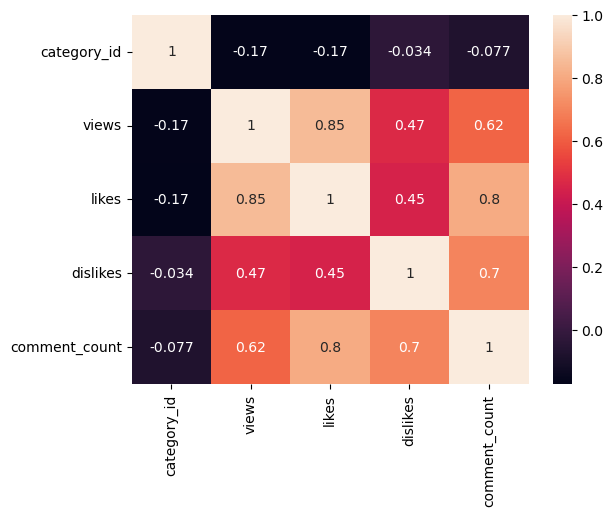

In [46]:
corr = df1.corr()
sns.heatmap(corr, annot=True)

In [47]:
df1.drop(["category_id"],axis=1,inplace=True)

In [48]:
df1.corr()

,views,likes,dislikes,comment_count
views,1.000000,0.849170,0.472239,0.617691
likes,0.849170,1.000000,0.447196,0.803069
dislikes,0.472239,0.447196,1.000000,0.700200
comment_count,0.617691,0.803069,0.700200,1.000000


<Axes: >

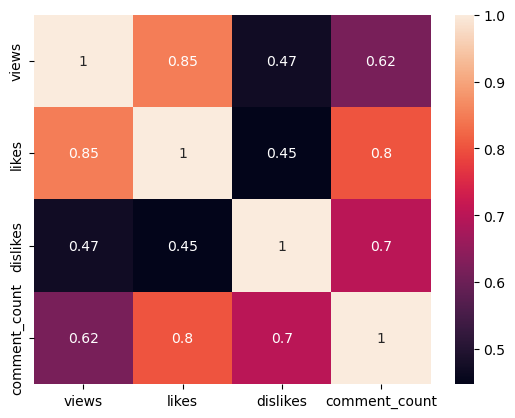

In [49]:
corr = df1.corr()
sns.heatmap(corr, annot=True)

In [50]:
df1.shape

(40998, 4)

# Splitting data into train and test

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
x = df1[['views', 'dislikes', 'comment_count']]
y = df1['likes']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=5)

In [53]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(32798, 3)
(32798,)
(8200, 3)
(8200,)


# 1.Linear Regression

In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import metrics

In [55]:
lr = LinearRegression()
lr.fit(x_train, y_train)      
lr_pred = lr.predict(x_test)  
print('RMSE:', np.sqrt(mean_squared_error(y_test, lr_pred, squared=False)))
print('r2 score: %.2f' % r2_score(y_test, lr_pred))
print("Test Accuracy : %.2f" % lr.score(x_test, y_test))
print("Train Accuracy : %.2f" % lr.score(x_train, y_train))

RMSE: 274.18414616937173
r2 score: 0.89
Test Accuracy : 0.89
Train Accuracy : 0.88


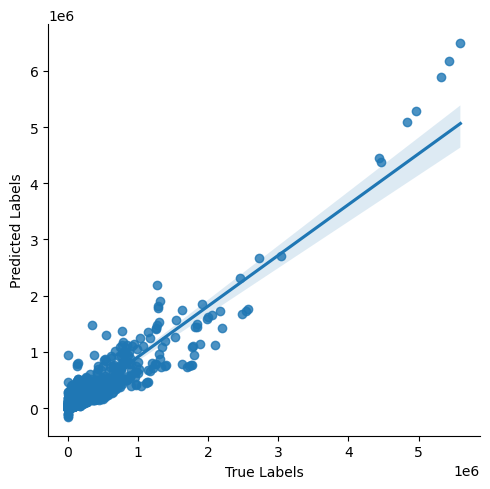

In [56]:
labels = {'True Labels': y_test, 'Predicted Labels': lr_pred}
df_lr = pd.DataFrame(data = labels)
sns.lmplot(x='True Labels', y= 'Predicted Labels', data = df_lr)

# 2.Random Forest

In [57]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [58]:
rf = RandomForestRegressor()
rf.fit(x_train, y_train)       
rf_pred = rf.predict(x_test)   
print('RMSE:', np.sqrt(mean_squared_error(y_test, rf_pred, squared=False)))
print('r2 score: %.2f' % r2_score(y_test, rf_pred))
print("Test Accuracy : %.2f" %  rf.score(x_test, y_test))
print("Train Accuracy : %.2f" % rf.score(x_train, y_train))

RMSE: 212.19047218156336
r2 score: 0.96
Test Accuracy : 0.96
Train Accuracy : 0.99


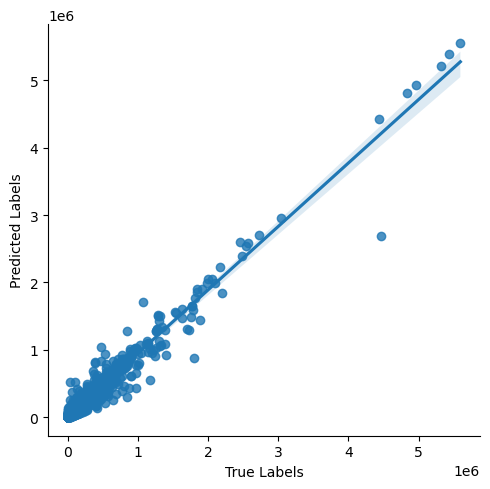

In [59]:
labels_rf = {'True Labels': y_test, 'Predicted Labels': rf_pred}
df_rf = pd.DataFrame(data = labels_rf)
sns.lmplot(x='True Labels', y= 'Predicted Labels', data = df_rf)

# 3.XGBoost Regressor

In [60]:
from xgboost import XGBRegressor

In [61]:
#Simple XGBoost

In [62]:
xgb = XGBRegressor()
xgb.fit(x_train, y_train)       # Fitting model with x_train and y_train
xgb_pred = xgb.predict(x_test)  # Predicting the results
print('RMSE:', np.sqrt(mean_squared_error(y_test, xgb_pred, squared=False)))
print('r2 score: %.2f' % r2_score(y_test, xgb_pred))
print("Accuracy :",xgb.score(x_test, y_test))

RMSE: 217.30862204791316
r2 score: 0.96
Accuracy : 0.9576865941416308


In [63]:
# Tuning XGBoost

In [64]:
xgb = XGBRegressor(n_estimators=5000, learning_rate=0.001)
xgb.fit(x_train, y_train)       # Fitting model with x_train and y_train
xgb_pred = xgb.predict(x_test)  # Predicting the results
print('RMSE:', np.sqrt(mean_squared_error(y_test, xgb_pred, squared=False)))
print('r2 score: %.2f' % r2_score(y_test, xgb_pred))
print("Accuracy :",xgb.score(x_test, y_test))

RMSE: 219.7121035230395
r2 score: 0.96
Accuracy : 0.955783325149014


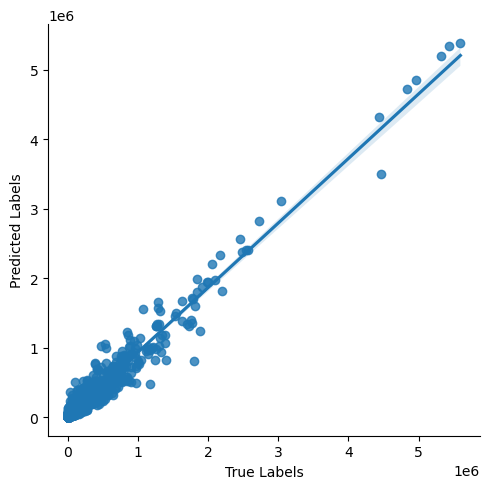

In [65]:
labels_xgb = {'True Labels': y_test, 'Predicted Labels': xgb_pred}
df_xgb = pd.DataFrame(data = labels_xgb)
sns.lmplot(x='True Labels', y= 'Predicted Labels', data = df_xgb)